In [2]:
#gaboceron10@gmail.com (2017)

import csv
import os
import random
import re
import numpy as np
import time
import sklearn
import matplotlib.pyplot as plt

#csv fieldnames
fieldnames=['index','song','year','artist','genre','lyrics']
#all available genres
all_genres=['Pop','Hip-Hop','Not Available','Other','Rock','Metal','Country','Jazz','Electronic','Folk','R&B','Indie']
#selected genres to classify
genres=['Pop','Hip-Hop','Rock','Metal','Country','Jazz']

In [2]:
#Getting the words of the training set (80%)

start_time = time.time()

w_list=[]
w_count=[]

for g in genres:
    print 'For '+g
    with open('lyr_gen_'+g+'_sh.csv') as load_file:
        reader = csv.DictReader(load_file)
        row_count = sum(1 for row in reader)
        load_file.seek(0)
        for i in range(row_count*80/100): #Selecting only 80% of dataset
            row=next(reader)
            words=re.compile('\w+').findall(row['lyrics'])
            for word in words:
                word=word.lower()
                if word in w_list:
                    plus=w_list.index(word)
                    w_count[plus]=w_count[plus]+1
                else:
                    w_list.append(word)
                    w_count.append(1)
    print 'End '+g
print("--- %s seconds ---" % (time.time() - start_time))

For Pop
End Pop
For Hip-Hop
End Hip-Hop
For Rock
End Rock
For Metal
End Metal
For Country
End Country
For Jazz
End Jazz
--- 934.404999971 seconds ---


In [3]:
#Saving the word list
with open('all_words.csv','w+') as csvfile:
    writer = csv.writer(csvfile)#El formato del csv tiene un espacio de por medio
    writer.writerow(w_list)
    writer.writerow(w_count)

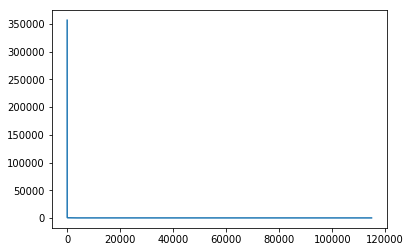

In [4]:
#creating an histogram of the word counting, just to get an idea of how are they spread
x,y=np.histogram(w_count,len(w_count)/10)
plt.plot(x,y[:-1])
plt.show()

In [3]:
# Loading the word list (this is done in order to run the program from this step if needed)

nw_count=[]
nw_list=[]

with open('all_words.csv') as csvfile:
    reader = csv.reader(csvfile)
    
    w_list=next(reader)
    w_count=map(int,next(reader)) 
    
    for i in range(len(w_count)):
        if w_count[i] in range(20):
            pass
        else:
            nw_count.append(w_count[i])
            nw_list.append(w_list[i])
print 'Array length: ',len(nw_count)

Array length:  13670


In [4]:
len(w_list)

125251

In [6]:
#loading the stop words list
with open('stop_words.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        stop_words=row #there is just one row, with 119 words

In [7]:
# In this step we sort the words

start_time = time.time()

arr = np.array(nw_count)
ind=arr.argsort()[-1000:][::-1] # sorting the most used words
b3_words=[]
b3_count=[]

b_words=[]
b_count=[]

for i in ind:
    b3_words.append(nw_list[i])
    b3_count.append(nw_count[i])
    
for j in range(len(b3_words)):
    if b3_words[j] in stop_words: # stop words are ignored
        pass
    else:
        b_words.append(b3_words[j])
        b_count.append(b3_count[j])

b1_words=b_words[:800] #selecting the number of words (features)
b1_count=b_count[:800]

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0239999294281 seconds ---


In [8]:
# saveing the features in a file
with open('best_words.csv','w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(b1_words)
print 'end'

end
